In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [2]:
DATA_PATH = 'data/'
DATASET = 'merged_data_clean.csv'

df = pd.read_csv(DATA_PATH + DATASET)

In [3]:
# Scale Data
from sklearn.preprocessing import StandardScaler
numeric_data = df.select_dtypes(include=[float, int])
scaled_data = StandardScaler().fit_transform(numeric_data)
scaled_data.shape

(129, 102)

Text(0.5, 1.0, 'UMAP of Non-Encoded Data with Bank Score')

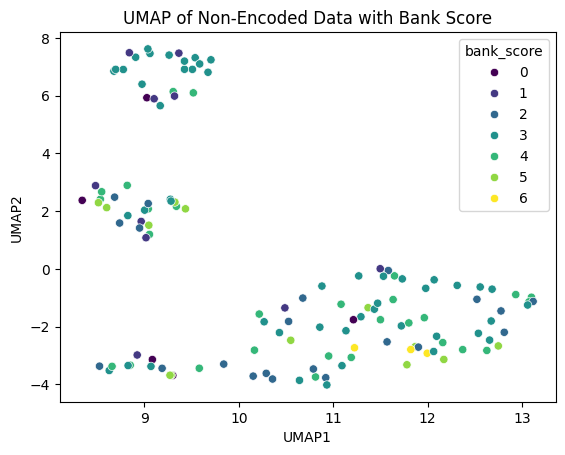

In [4]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_data)

umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
score = df['Pounds of Food Distributed'] / df['TractLOWI']
min_score = np.min([val for val in score if val > 0.0])
imputed_score = np.array([min_score if val == 0.0 else val for val in score])
umap_df['bank_score'] = pd.cut(np.log(imputed_score), bins=7, labels=False)

plt.figure()
sns.scatterplot(
    x="UMAP1", y="UMAP2",
    hue="bank_score",
    palette=sns.color_palette("viridis", as_cmap=True),
    data=umap_df,
    legend="auto"
)

plt.title("UMAP of Non-Encoded Data with Bank Score")

In [5]:
# Use k-means to cluster data and plot distribution of bank scores by cluster
from sklearn.cluster import KMeans
import plotly.express as px
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto').fit(scaled_data)
umap_df['cluster'] = kmeans.labels_
fig = px.histogram(
    umap_df, x="bank_score", color="cluster",
    opacity=0.6, barmode='overlay', title="Distribution of Bank Scores by Cluster"
)
fig.show()
fig.write_image("umap_bank_score.png")

In [6]:
# from umap.parametric_umap import ParametricUMAP
# reducer = ParametricUMAP(n_training_epochs=100)
# embedding = reducer.fit_transform(scaled_data)

# umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
# score = df['Pounds of Food Distributed'] / df['TractLOWI']
# min_score = np.min([val for val in score if val > 0.0])
# imputed_score = np.array([min_score if val == 0.0 else val for val in score])
# umap_df['bank_score'] = pd.cut(np.log(imputed_score), bins=7, labels=False)

# plt.figure()
# sns.scatterplot(
#     x="UMAP1", y="UMAP2",
#     hue="bank_score",
#     palette=sns.color_palette("viridis", as_cmap=True),
#     data=umap_df,
#     legend="auto"
# )

# plt.title("Parametric UMAP of Non-Encoded Data with Bank Score")